# Curse Of Dimensionality 
#### In this part basically the number of features are reduced to increase model accuracy 
#### IT is divided in two parts
#### 1. Feature Scaling :  To tkae only the imp feature by checking their covariance and correlation
#### 2. Feature extraction : Decomposition of feature from higher dimension to lower dimension by very less loss of information to caputre maximum variance 

# 1. Feature Scaling 

#### In this case we can reduce the dimension by neglecting most of the feature but the loss of varinace on different axis is more 

In [5]:
### Creating a sample code of it 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.DataFrame({
    'x1':np.random.random(size=20),
    'x2':np.random.random(size=20),
    'x3':np.random.random(size=20),
    'x4':np.random.random(size=20),
    'x5':np.random.random(size=20),
    'y':np.random.random(size=20),
})

In [25]:
df.head()

,x1,x2,x3,x4,x5,y
0,0.618782,0.215514,0.841981,0.190904,0.543102,0.458093
1,0.009792,0.835429,0.466318,0.334918,0.594801,0.626480
2,0.124357,0.799193,0.350295,0.294168,0.164549,0.204003
3,0.834302,0.012945,0.189330,0.501012,0.747756,0.387324
4,0.755483,0.676604,0.136802,0.846225,0.435918,0.257836


In [37]:
def Calculate_covariance(x,y):
    if(len(x)<2): 
        return 0
    x_bar=np.mean(x)
    y_bar=np.mean(y)
    value=0
    for i in range(len(x)):
        value+=((x[i]-x_bar)*(y[i]-y_bar))
    corr=value/len(x)-1
    return corr

def calculate_correlation(x,y):
    if(len(x)<2):
        return 0
    x_std=np.std(x)
    y_std=np.std(y)
    value=0
    for i in range(len(x)):
        value+=((x[i]-x_bar)*(y[i]-y_bar))
    col=value/(x_std*y_std)
    return col    

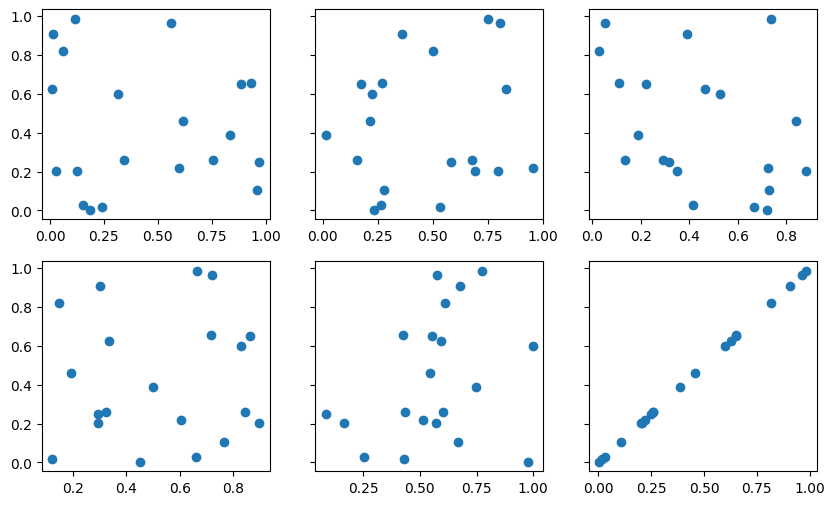

In [44]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,6),sharey=True)
ax[0,0].scatter(x=df.x1,y=df.y)
ax[0,1].scatter(x=df.x2,y=df.y)
ax[0,2].scatter(x=df.x3,y=df.y)
ax[1,0].scatter(x=df.x4,y=df.y)
ax[1,1].scatter(x=df.x5,y=df.y)
ax[1,2].scatter(x=df.y,y=df.y)
fig.set_label('yaxis')
fig.show()

In [43]:
df.corr(method='pearson')['y'].sort_values(ascending=False)

y     1.000000
x5    0.281981
x2    0.127774
x4    0.056663
x1   -0.109800
x3   -0.379807
Name: y, dtype: float64

#### So From this x3  is more negatively correlted so it can be used

## Main Ideas Of Covariance 
#### So it is just a metric used to calculate the relation between the dependent and independent variable i.e x and y 
#### Here if the x is increasing and y is incresing or x is decreasing and y is decreasing then there is positive covariance 
#### Here if the x is increasing and y is decreasing or x is increasing and y is decreasing then there is negative covariance 
#### An when their is no change that x is increasing and some time y is and not also then their is zero covariance 
#### Conlusion : 1. If there is higher positive covariance then it is (+)ive and vice versa or zero 

## Correlation :
#### So here it is similar to covariance but change is that it is scaled between -1 to 1 

## 2. Feature Extraction
#### Without droping most of the feature in this techinque we basically decompose it in lower dimension by taking most of the essence of fearure 
#### eg :- if their are 10 fearure it is not possible to visualize but by doing feature extraction we can do it by converting to 2d (dimension)
#### This Whole Stuff is Happened using 'PCA' (principal Component Analysis)
#### Here eigen vector and eigen value decomposition is uwed to calculate thet vector (pc1 , pc2 ,....,pcn) and the captured variance which is eigen value and arranged in descending order 
#### Visualize this simulation on 3blue1brown channel :::: - Linear Transfromation

### So for this lets import built in dataset
## NOTE : Data is SCALED befor doing linear transformation to center data 

In [47]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print(f"Data Struecture : {cancer.keys()}")
print(f"Data Description : {cancer.DESCR}")

Data Struecture : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Data Description : .. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed 

In [49]:
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### So there are 30 feature and directly visulation is nut posible 
### So Lets decompose it in two dimension

In [50]:
#### First Scaling it 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [51]:
df_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]], shape=(569, 30))

In [52]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) # To get data in two dimension
df_pca=pca.fit_transform(df_scaled)

In [53]:
df_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]], shape=(569, 2))

In [59]:
pca.explained_variance_[0]

np.float64(13.304990794374564)

Text(0.5, 1.0, 'PCA Plot')

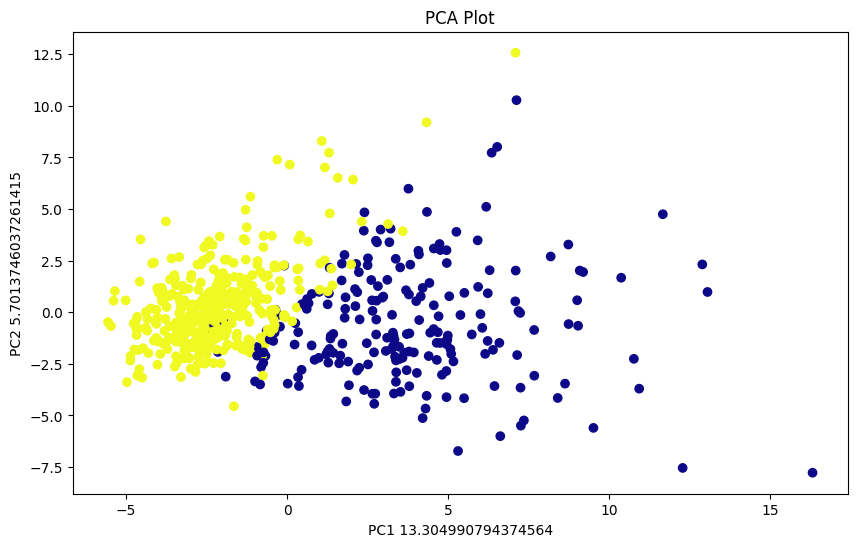

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(x=df_pca[:,0],y=df_pca[:,1],c=cancer.target,cmap='plasma')
plt.xlabel(f"PC1 {pca.explained_variance_[0]}")
plt.ylabel(f"PC2 {pca.explained_variance_[1]}")
plt.title("PCA Plot")

#### Most of the information is caputred so points are seperated 